# centiBils: A unit for Investment Performance Analysis

<br><br>
## Tobias Brandt ##
<!-- <img src="media/argon_logo.png" align=left width=400> -->
![Argon Logo](media/argon_logo.png)

# Abstract

Percentage Returns are the de-facto standard for Investment Performance
Measurement. Yet they are not very well suited for multi-period performance
evaluation. As an illustrative example, does the sequence (-30%, +40%) represent a
positive or negative overall return? We review some of the problems with using
percentage returns such as the lack of symmetry, lack of additivity and
differences between the arithmetic and geometric means. We then introduce a new
logarithmic unit modeled on the deciBel, tentatively called a centiBil, which
addresses these shortcomings. Finally we conclude by using the centiBil to
compare the performance of US Stocks, Bonds and Bills since 1927 and show how
their use eases cross-period comparisons.

# Agenda

 1. Problems with (Simple-)Returns
      * Returns are not symmetric
      * Returns are not (longitudinally) additive
      * The mean return doesn't represent the growth rate of the investment
 2. Problems with existing logarithmic units
      * Neper
      * Bels (i.e. deciBels)

# Agenda (contd)

3. centiBils
      * Definition
      * Conversions
      * Standard Values
4. Applications
      * S&P 500 Returns since 1927

# Problems with Returns

## Returns are not symmetric

  * You are probably aware that if your investment experiences a **-50%** return, you need a **+100%** just to break even again.
  * This lack of symmetry makes it difficult to interpret sequences of returns.

## Returns are not (longitudinally) additive

  * For example, does the sequence (-30%, +40%) represent an overall positive or negative return?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)
ln = np.log

In [2]:
r = (1-30/100)*(1+40/100)-1
print("r = {r:.2f} = {r:.2%}".format(r=r))

r = -0.02 = -2.00%


$$ r = (1 - \frac{30}{100})(1 + \frac{40}{100}) - 1 $$

$$ \implies r = -0.02 = -2\% $$

## The mean return doesn't represent the growth rate

In [3]:
us_data = pd.read_excel('data/histretSP.xls', sheetname='Returns by year', skiprows=17, skip_footer=10, index_col=0)
# us_data = us_data.loc[1950:]
pd.concat([us_data.head(5), us_data.tail(5)])

,S&P 500,3-month T.Bill,10-year T. Bond,Stocks,T.Bills,T.Bonds,Stocks - Bills,Stocks - Bonds,Historical risk premium
Year,,,,,,,,,
1928,0.438112,0.03080,0.008355,143.811155,103.080000,100.835471,0.407312,0.429757,NaN
1929,-0.082979,0.03160,0.042038,131.877782,106.337328,105.074397,-0.114579,-0.125018,NaN
1930,-0.251236,0.04550,0.045409,98.745288,111.175676,109.845753,-0.296736,-0.296646,NaN
1931,-0.438375,0.02310,-0.025589,55.457774,113.743835,107.034958,-0.461475,-0.412787,NaN
1932,-0.086424,0.01070,0.087903,50.664911,114.960894,116.443660,-0.097124,-0.174327,NaN
2011,0.020984,0.00030,0.160353,166871.562968,1970.435920,6726.521265,0.020684,-0.139370,0.040970
2012,0.158906,0.00050,0.029716,193388.430926,1971.421138,6926.404686,0.158406,0.129190,0.041988
2013,0.321451,0.00066,-0.091046,255553.308086,1972.722276,6295.785407,0.320791,0.412497,0.046177
2014,0.135244,0.00053,0.107462,290115.415011,1973.767818,6972.341867,0.134714,0.027782,0.045975


In [4]:
from IPython.core.display import display, HTML
def to_html_perc(df):
    return HTML(df.to_html(formatters={c:"{:,.2%}".format for c in df.columns}))

def calc_metrics(returns):
    df = pd.DataFrame(returns.mean(skipna=False).to_frame().T)
    df.index = ['Mean']
    df.loc['Std Dev.'] = returns.std()
    df.loc['CAGR'] = np.expm1(np.log1p(returns).mean(skipna=False))
    return df

returns = us_data.iloc[:, [1, 2, 0]].copy()

In [5]:
sp500 = returns['S&P 500']
tbill = returns['3-month T.Bill']
returns['S&P 2X'] = 1*(sp500-sp500.mean())+sp500

### Example: US Asset Class Returns (since 1927) ###

In [6]:
us_returns_sample = pd.concat([returns.head(2), returns.tail(2)])

In [7]:
to_html_perc(us_returns_sample)

,3-month T.Bill,10-year T. Bond,S&P 500,S&P 2X
Year,,,,
1928,3.08%,0.84%,43.81%,76.21%
1929,3.16%,4.20%,-8.30%,-28.01%
2014,0.05%,10.75%,13.52%,15.64%
2015,0.21%,1.28%,1.36%,-8.69%


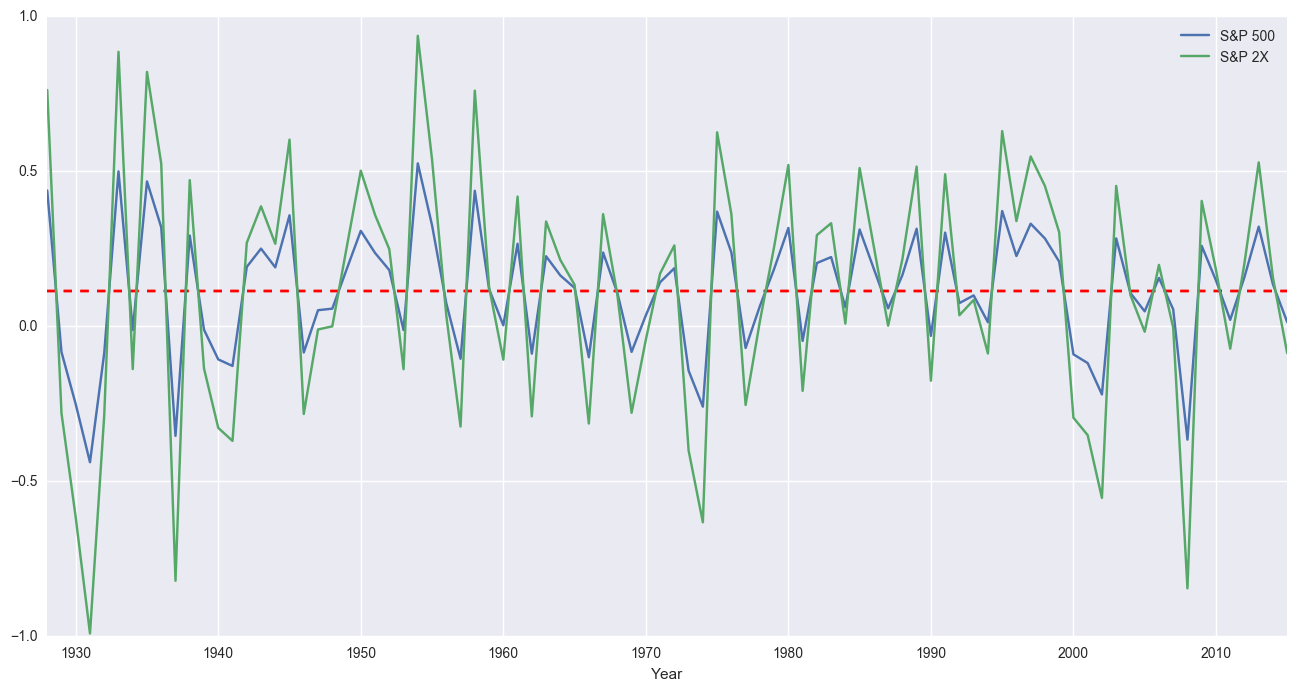

In [8]:
returns.iloc[:, 2:4].plot(); plt.hlines(y=returns.iloc[:, 2:4].mean(), xmin=returns.first_valid_index(), xmax=returns.last_valid_index(), linestyles='dashed', color='r');

In [9]:
to_html_perc(calc_metrics(returns).iloc[0:2])

,3-month T.Bill,10-year T. Bond,S&P 500,S&P 2X
Mean,3.49%,5.23%,11.41%,11.41%
Std Dev.,3.07%,7.79%,19.82%,39.63%


In [10]:
to_html_perc(calc_metrics(returns))

,3-month T.Bill,10-year T. Bond,S&P 500,S&P 2X
Mean,3.49%,5.23%,11.41%,11.41%
Std Dev.,3.07%,7.79%,19.82%,39.63%
CAGR,3.45%,4.96%,9.50%,-1.22%


### Compound Annual Growth Rate

$$ g = \mu - \frac{1}{2}\sigma^2 $$

In [11]:
us = us_data[['T.Bills', 'T.Bonds', 'Stocks']].copy()
#us['Stocks x2'] = 100*np.exp(np.log1p(returns['S&P 2X']).cumsum())
us.loc[1927] = 100
us.sort_index(inplace=True)
us = us/us.iloc[0]
#us['S&P 2X'] = np.exp(np.cumsum(np.log1p(returns['S&P 2X'])))
pd.concat([us.head(3), us.tail(3)])

,T.Bills,T.Bonds,Stocks
Year,,,
1927,1.000000,1.000000,1.000000
1928,1.030800,1.008355,1.438112
1929,1.063373,1.050744,1.318778
2013,19.727223,62.957854,2555.533081
2014,19.737678,69.723419,2901.154150
2015,19.779127,70.618876,2940.608381


## Returns are often not useful for graphical analysis ## 

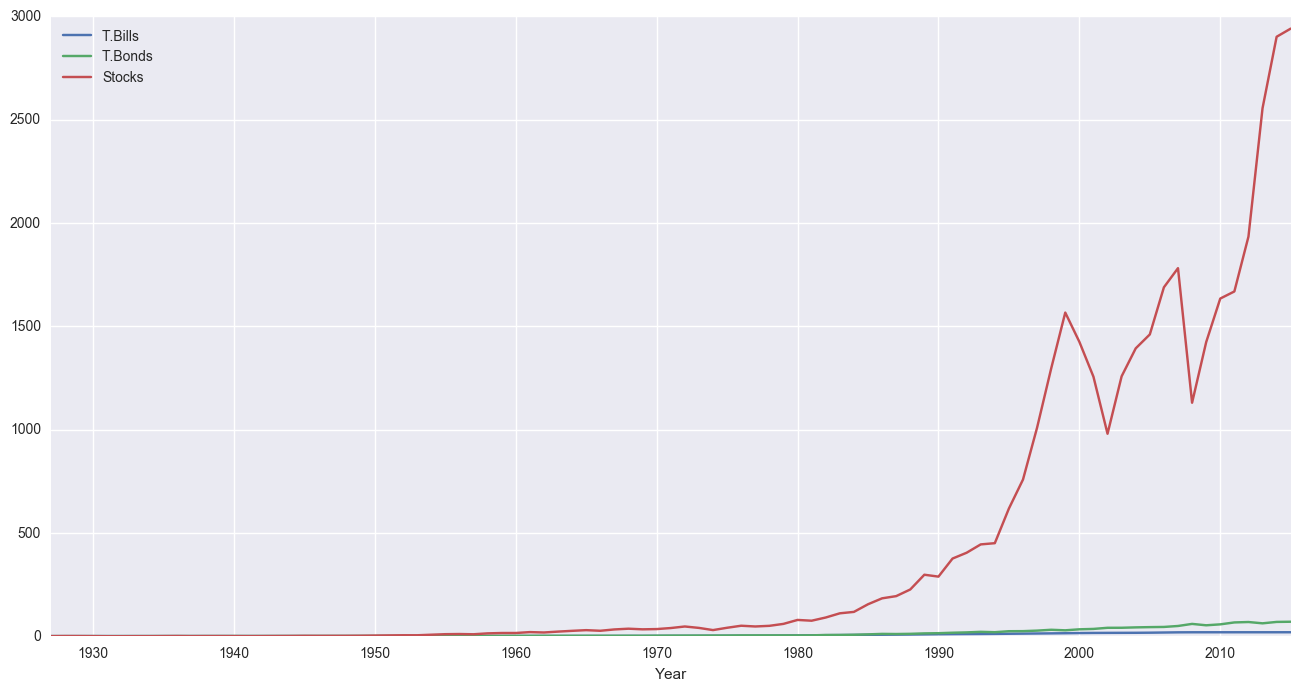

In [12]:
us.plot();

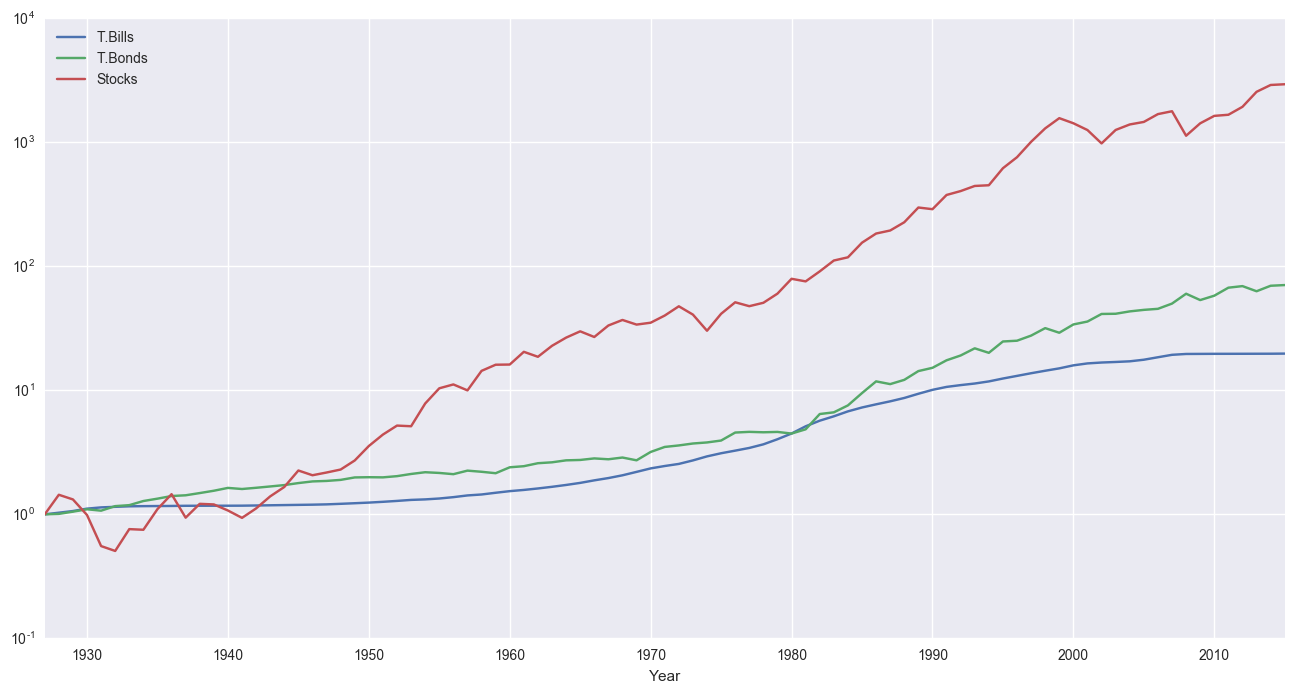

In [13]:
us.plot(logy=True);

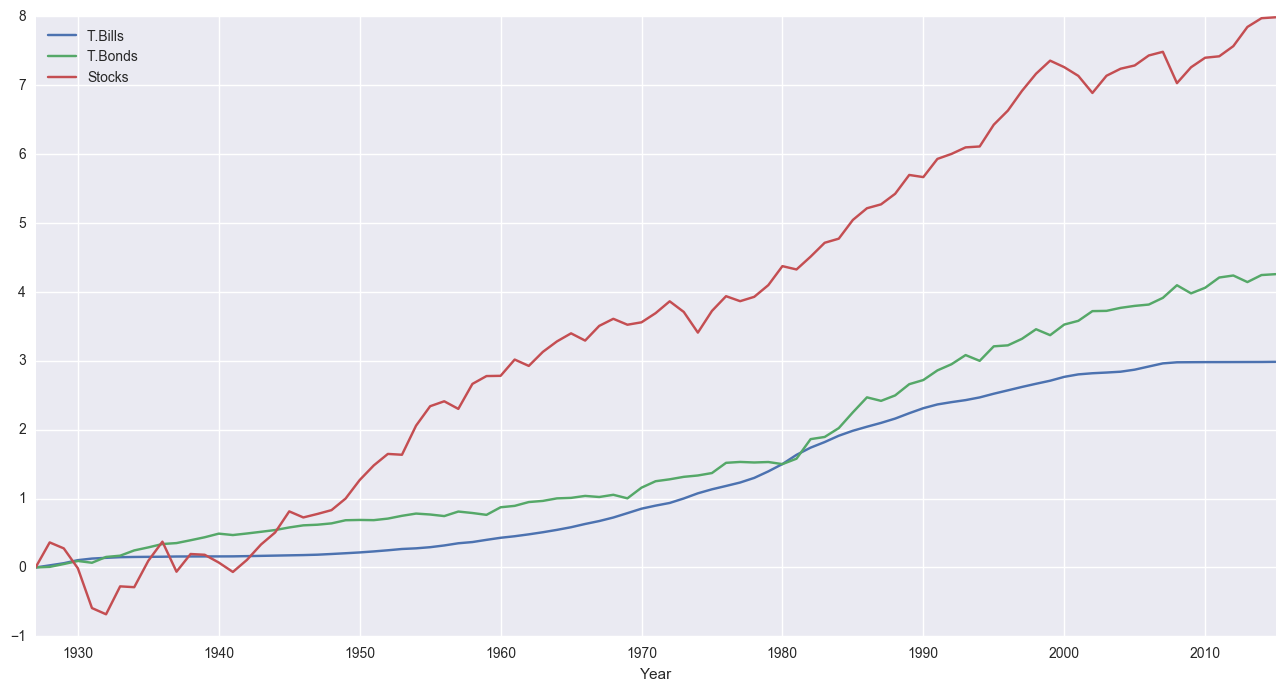

In [14]:
ln(us).plot();

## Neper ##

The **neper** (unit symbol **Np**) is a logarithmic unit for ratios of measurements of physical field and power quantities, such as gain and loss of electronic signals. The unit's name is derived from the name of John Napier, the inventor of logarithms.

Like the decibel, the neper is a unit in a logarithmic scale. While the bel uses the decadic (base-10) logarithm to compute ratios, the neper uses the natural logarithm, based on Euler's number (e ≈ 2.71828). The value of a ratio in nepers is given by

$$ L_{\rm {Np}}=\ln {\frac {x_{1}}{x_{2}}}=\ln x_{1}-\ln x_{2}.$$

where $ x_{1} $ and $ x_{2} $ are the values of interest (amplitudes), and $\ln$ is the natural logarithm.

## Decibels ##

When referring to measurements of power quantities, a ratio can be expressed as a level in **decibels** by evaluating ten times the base-10 logarithm of the ratio of the measured quantity to reference value. Thus, the ratio of $P$ (measured power) to $P_{0}$ (reference power) is represented by $L_{P}$, that ratio expressed in decibels,[17] which is calculated using the formula:[2]

$$ L_{P}=10\log _{10}\!\left({\frac {P}{P_{0}}}\right)\!~\mathrm {dB} $$

The base-10 logarithm of the ratio of the two power levels is the number of **bels**. The number of decibels is ten times the number of bels (equivalently, a decibel is one-tenth of a bel).

## centiBils ##

When referring to measurements of **asset prices**, a ratio can be expressed as a level in **centibils** by evaluating **one hundred times** the **base-2 logarithm** of the ratio of the **measured price** to **reference price**. Thus, the ratio of $S$ (measured price) to $S_{0}$ (reference price) is represented by $L_{S}$, that ratio expressed in centibils, which is calculated using the formula:

$$ L_{S}=100\log _{2}\!\left({\frac {S}{S_{0}}}\right)\!~\mathrm {cB} $$

The base-2 logarithm of the ratio of the two prices is the number of **bils**. The number of centibils is one hundred times the number of bils (equivalently, a centibil is one-hundreth of a bil).

### Conversions ###

$$ L_{S}=100\log _{2}\!\left( \frac{S}{S_0} \right)\!~\mathrm {cB} $$

and $$ \frac{S}{S_0} = 1 + r $$

$$ \implies L_{S}=100\log _{2}\!\left( 1 + r \right)\!~\mathrm {cB} $$

$$ \implies L_{S}=\frac{100}{\ln 2}\ln\!\left( 1 + r \right)\!~\mathrm {cB} $$

$$ \implies L_{S}=144.269504 \ln\!\left( 1 + r \right)\!~\mathrm {cB} $$

Similarly
$$ L_{S}=100\log _{2}\!\left( 1 + r \right)\!~\mathrm {cB} $$

$$ \implies 1 + r = 2^{ \left( \frac{L_{S}}{100} \right) } $$

$$ \implies 1 + r = \exp \!\left( \ln 2 \frac{L_{S}}{100} \right) $$

$$ \implies r = \exp \!\left( \frac{\ln 2}{100} L_{S} \right) - 1 $$

$$ \implies r = \exp \!\left( \frac{L_{S}}{144.269504} \right) - 1 $$


In [15]:
CENTIBIL_FACTOR = 100/np.log(2)

def ret2cb(ret):
    return CENTIBIL_FACTOR * np.log1p(ret)

def cb2ret(cb):
    return np.expm1(cb / CENTIBIL_FACTOR)

def prc2cb(idx):
    return CENTIBIL_FACTOR * np.log(idx)

def cb2prc(cb):
    return np.exp(cb / CENTIBIL_FACTOR)

### Standard Percentage Returns ###

In [16]:
vals = np.array([-1, -0.50, -0.25, -0.20, -0.10, -0.01, -0.0001])
std_rets = np.r_[vals, 0, -vals[::-1]]
standard_returns = HTML(pd.DataFrame({'Percentage Return':std_rets, 'centiBils Return':ret2cb(std_rets)})
                        .to_html(formatters={'Percentage Return':"{:,.2%}".format, 'centiBils Return':"{:,.2f} cB".format})
                        )

In [17]:
standard_returns

,Percentage Return,centiBils Return
0,-100.00%,-inf cB
1,-50.00%,-100.00 cB
2,-25.00%,-41.50 cB
3,-20.00%,-32.19 cB
4,-10.00%,-15.20 cB
5,-1.00%,-1.45 cB
6,-0.01%,-0.01 cB
7,0.00%,0.00 cB
8,0.01%,0.01 cB
9,1.00%,1.44 cB


### Standard centiBil Values ###

In [18]:
std_cbs = 100*np.r_[vals, 0, -vals[::-1]]
standard_centibils = HTML(pd.DataFrame({'centiBils Return':std_cbs, 'Percentage Return':cb2ret(std_cbs)})
                        .to_html(formatters={'Percentage Return':"{:,.2%}".format, 'centiBils Return':"{:,.2f} cB".format})
                        )

In [19]:
standard_centibils

,Percentage Return,centiBils Return
0,-50.00%,-100.00 cB
1,-29.29%,-50.00 cB
2,-15.91%,-25.00 cB
3,-12.94%,-20.00 cB
4,-6.70%,-10.00 cB
5,-0.69%,-1.00 cB
6,-0.01%,-0.01 cB
7,0.00%,0.00 cB
8,0.01%,0.01 cB
9,0.70%,1.00 cB


## Applications

In [20]:
vals = np.array([-0.30, 0.40])
rets = np.r_[vals]
tbl = HTML(pd.DataFrame({'Percentage Return':rets, 'centiBils Return':ret2cb(rets)})
                        .to_html(formatters={'Percentage Return':"{:,.2%}".format, 'centiBils Return':"{:,.2f} cB".format},
                                 index=False)
                        )

### centiBils are symmetric! ###

### centiBils are additive! ###

In [21]:
tbl

Percentage Return,centiBils Return
-30.00%,-51.46 cB
40.00%,48.54 cB


### centiBils averages are representative of growth rates! ###

In [22]:
cb_metrics = HTML(calc_metrics(ret2cb(returns))
                  .drop('CAGR')
                  .to_html(formatters={c:"{:.2f} cB".format for c in returns.columns})
                  )

In [23]:
to_html_perc(calc_metrics(returns))

,3-month T.Bill,10-year T. Bond,S&P 500,S&P 2X
Mean,3.49%,5.23%,11.41%,11.41%
Std Dev.,3.07%,7.79%,19.82%,39.63%
CAGR,3.45%,4.96%,9.50%,-1.22%


In [24]:
cb_metrics

,3-month T.Bill,10-year T. Bond,S&P 500,S&P 2X
Mean,4.89 cB,6.98 cB,13.09 cB,-1.77 cB
Std Dev.,4.22 cB,10.40 cB,27.83 cB,97.00 cB


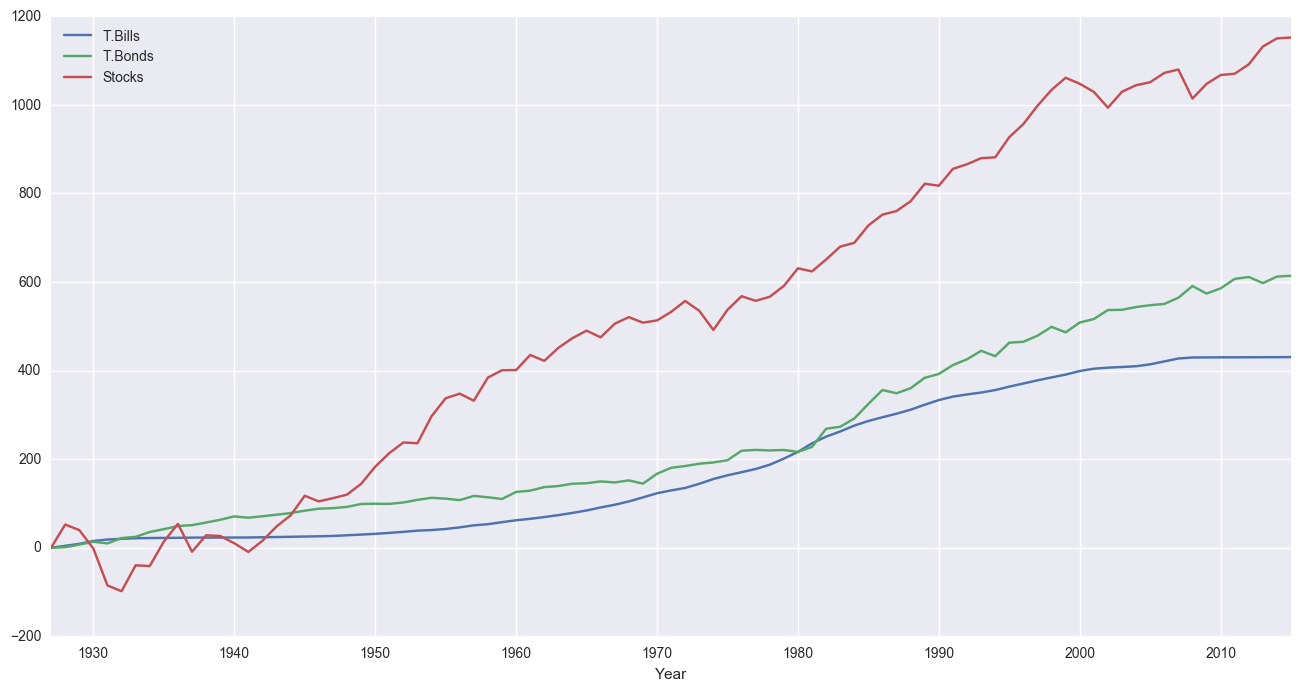

In [25]:
prc2cb(us).plot();

## Conclusion ##

![Axes Perspective](media/axes_perspective.png)

### Some times changing what's on the axes can lead to new insights! ###

# Questions? #

![Argon Website](media/argon_website.png)

## Thank you! ##

In [26]:
%%HTML
<video controls>
  <source src="media/I_ve_got_bills.mp4" type="video/mp4">
</video>